In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing # Load the California housing dataset
housing = fetch_california_housing()

In [5]:
fetch_california_housing

<function sklearn.datasets._california_housing.fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False, n_retries=3, delay=1.0)>

In [6]:
pd.DataFrame(housing.data)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [10]:
df = pd.DataFrame(housing.data) # Convert to DataFrame
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
dataset = df

In [21]:
dataset.columns = housing.feature_names

In [22]:
## Independent Features and dependent features
X = dataset
y = housing.target

In [23]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [24]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1989,1.9750,52.0,2.800000,0.700000,193.0,4.825000,36.73,-119.79
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21
7887,6.2990,17.0,6.478022,1.087912,1387.0,3.810440,33.87,-118.04
4581,1.7199,17.0,2.518000,1.196000,3051.0,3.051000,34.06,-118.28
1993,2.2206,50.0,4.622754,1.161677,606.0,3.628743,36.73,-119.81
...,...,...,...,...,...,...,...,...
13123,4.4125,20.0,6.000000,1.045662,712.0,3.251142,38.27,-121.26
19648,2.9135,27.0,5.349282,0.933014,647.0,3.095694,37.48,-120.89
9845,3.1977,31.0,3.641221,0.941476,704.0,1.791349,36.58,-121.90
10799,5.6315,34.0,4.540598,1.064103,1052.0,2.247863,33.62,-117.93


In [26]:
## standardizing the datset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression

## cross validation
from sklearn.model_selection import cross_val_score

In [31]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [33]:
np.mean(mse)

-0.5230719414098426

In [34]:
## Prediction
reg_pred = regression.predict(X_test)

In [35]:
reg_pred

array([2.2702672 , 2.79059912, 1.90984782, ..., 3.56895295, 0.98163812,
       2.72552317])

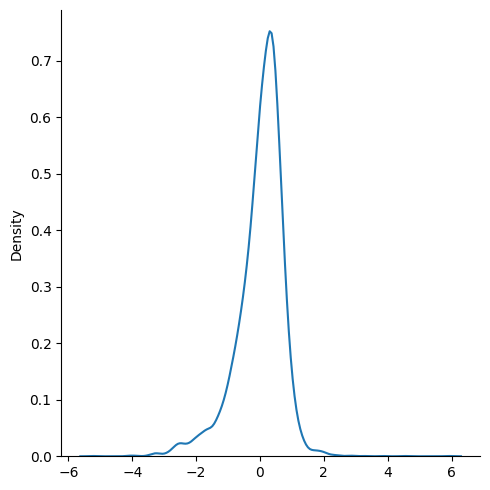

In [36]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [37]:
from sklearn.metrics import r2_score

In [38]:

score=r2_score(reg_pred,y_test)

In [39]:
score

0.3437780761431827